In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/aniket0712/parking-transactions")

load the dataset

In [2]:
data = pd.read_csv("Parking_transactions.csv",low_memory=False)

overview of data

In [3]:
data.head(5)

,ID,Source,Duration in Minutes,Start Time,End Time,Amount,Kiosk ID,App Zone ID,App Zone Group,Payment Method,Location Group,Last Updated
0,91886070,Parking Meters,219.90000,03/16/2023 08:19:05 PM,03/16/2023 11:58:59 PM,9.16,10001040.0,NaN,NaN,CARD,Core,04/30/2023 09:26:36 AM
1,91886073,Parking Meters,135.00000,03/16/2023 08:19:49 PM,03/16/2023 10:34:49 PM,4.75,10000632.0,NaN,NaN,CARD,Core,04/30/2023 09:26:36 AM
2,91886074,Parking Meters,218.03334,03/16/2023 08:20:57 PM,03/16/2023 11:58:59 PM,9.03,24002477.0,NaN,NaN,CARD,East Austin,04/30/2023 09:26:36 AM
3,91886075,Parking Meters,135.00000,03/16/2023 08:19:37 PM,03/16/2023 10:34:37 PM,4.75,10000402.0,NaN,NaN,CARD,Core,04/30/2023 09:26:36 AM
4,491450182,Passport - app,90.00000,09/09/2023 06:41:00 PM,09/09/2023 08:11:00 PM,3.30,NaN,39744.0,East Austin PTMD,App - Wallet,East Austin,10/31/2023 09:19:19 AM


checking null values

In [4]:
data.isnull().sum()

ID                           0
Source                       0
Duration in Minutes          0
Start Time                   0
End Time                     0
Amount                       0
Kiosk ID               6804060
App Zone ID            8240734
App Zone Group         8240734
Payment Method               0
Location Group              19
Last Updated                 0
dtype: int64

Kiosk ID, App Zone ID, App Zone Group have a lot null values.so avoid them for further analysis.
Location group has 19 null values it is avoidable.

In [5]:
data.duplicated().sum()

0

data has no duplicate values

In [ ]:
describing the data

In [6]:
data.describe()

,ID,Duration in Minutes,Amount,Kiosk ID,App Zone ID
count,1.504479e+07,1.504479e+07,1.504479e+07,8.240734e+06,6.804060e+06
mean,2.523234e+08,1.662916e+02,4.878640e+00,2.394201e+07,3.950752e+04
std,1.984594e+08,1.564286e+04,4.622426e+00,2.044900e+07,4.483959e+04
min,7.820985e+07,-8.611000e+02,0.000000e+00,1.000010e+07,1.010000e+02
25%,8.804848e+07,6.000000e+01,2.250000e+00,1.000066e+07,3.919900e+04
50%,9.771647e+07,1.050000e+02,3.400000e+00,2.000096e+07,3.941700e+04
75%,4.340395e+08,1.650000e+02,5.500000e+00,2.600260e+07,3.970800e+04
max,6.406717e+08,7.201106e+06,1.470000e+02,9.100190e+07,3.901300e+07


data has 5 numerical rows.

overview of datatypes of dataset.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15044794 entries, 0 to 15044793
Data columns (total 12 columns):
 #   Column               Dtype  
---  ------               -----  
 0   ID                   int64  
 1   Source               object 
 2   Duration in Minutes  float64
 3   Start Time           object 
 4   End Time             object 
 5   Amount               float64
 6   Kiosk ID             float64
 7   App Zone ID          float64
 8   App Zone Group       object 
 9   Payment Method       object 
 10  Location Group       object 
 11  Last Updated         object 
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ GB


changing datatype of Start Time, End Time, Last Updated from object to datetime

In [11]:
data['Start Time'] = pd.to_datetime(data['Start Time'],format='%m/%d/%Y %I:%M:%S %p')
data['End Time'] = pd.to_datetime(data['End Time'],format='%m/%d/%Y %I:%M:%S %p')
data['Last Updated'] = pd.to_datetime(data['Last Updated'],format='%m/%d/%Y %I:%M:%S %p')

In [ ]:
1.GENERAL OVERVIEW

1.1 What is the total number of parking transactions in the dataset?

In [14]:
len(data)

15044794

1.2 What is the time range covered by the transactions (earliest and latest date)?

In [50]:
print(min(data['Start Time']),max(data['Start Time']),sep=",")

2019-12-31 18:00:00,2025-02-18 09:18:00


1.3 How many unique parking locations are present in the dataset?

In [21]:
locations = data['Location Group'].unique()
locations

array(['Core', 'East Austin', 'Toomey', 'Mueller', 'Rainey', 'Non-Core',
       'West Campus', 'MoPac Lot', 'Butler Shores', 'Emma', 'Walter',
       'Austin High', 'Woods of Westlake', "Dawson's Lot",
       'Colorado River', 'Walsh', 'MACC Lot', 'Unknown Location',
       'IH 35 Lot', 'South Congress', 'Q2 Stadium',
       'Silicon and Titanium', nan, 'Deep Eddy Pool', 'Bartholomew Pool',
       'Garrison Pool', 'Northwest Pool'], dtype=object)

In [22]:
len(locations)

27

1.4 What are the busiest and least-used parking locations?

In [28]:
busiest_locations_list = data['Location Group'].value_counts().reset_index()

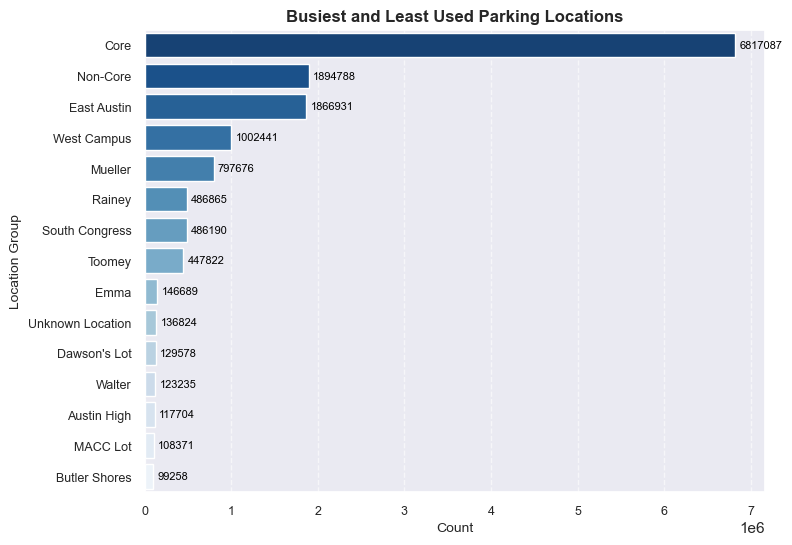

In [48]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(
data=busiest_locations_list[:15], x='count', y='Location Group', hue='Location Group' , palette="Blues_r", legend=False)
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", fontsize=8, padding=3, color="black")
ax.set_title("Busiest and Least Used Parking Locations", fontsize=12, fontweight="bold")
ax.set_xlabel("Count", fontsize=10)
ax.set_ylabel("Location Group", fontsize=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.grid(axis='x', linestyle="--", alpha=0.6)
plt.show()

2. FINANCIAL AND REVENUE ANALYSIS

2.1 What is the total revenue generated from parking transactions?

In [110]:
data['Amount'].sum()

73398138.58000012

2.2 What are the average, minimum, and maximum parking fees?

In [115]:
print(f"average parking fees : {data['Amount'].mean():.2f} \nminimum parking fees : {data['Amount'].min()} \nmaximum parking fees : {data['Amount'].max()}")

average parking fees : 4.88 
minimum parking fees : 0.0 
maximum parking fees : 147.0


2.3 Which locations generate the highest and lowest revenue?

In [117]:
location_revenue = data.groupby('Location Group')['Amount'].sum().reset_index()
location_revenue_sorted = location_revenue.sort_values(by='Amount', ascending=False)
highest_revenue_location = location_revenue_sorted.iloc[0]
lowest_revenue_location = location_revenue_sorted.iloc[-1]
print(f"📍 Highest Revenue Location: {highest_revenue_location['Location Group']} - ₹{highest_revenue_location['Amount']:.2f}")
print(f"📍 Lowest Revenue Location: {lowest_revenue_location['Location Group']} - ₹{lowest_revenue_location['Amount']:.2f}")

📍 Highest Revenue Location: Core - ₹34271608.26
📍 Lowest Revenue Location: Silicon and Titanium - ₹2789.40


3.TEMPORAL ANALYSIS

3.1 What are the peak hours for parking transactions?.

In [55]:
data['hour'] = pd.to_numeric(data['Start Time'].dt.hour)

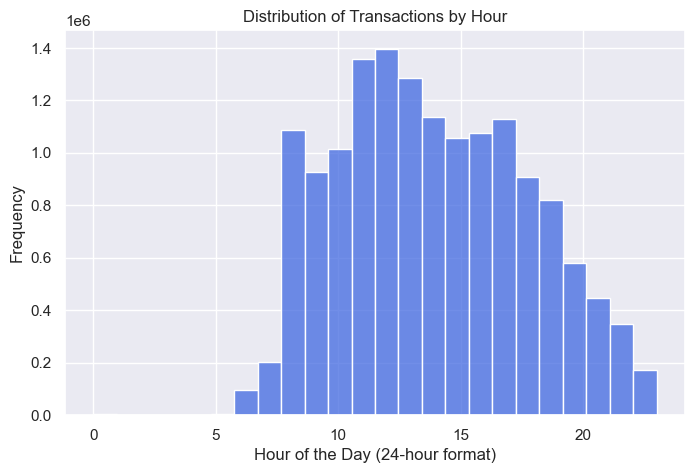

In [57]:
plt.figure(figsize=(8,5))
sns.histplot(data = data['hour'], bins=24, kde=False, color='royalblue')
plt.xlabel("Hour of the Day (24-hour format)")
plt.ylabel("Frequency")
plt.title("Distribution of Transactions by Hour")
plt.show()

peak hours for parking transactions are 9 AM to 7 PM.

3.2 How do parking transactions vary by day of the week?

In [70]:
data['day'] = data['Start Time'].dt.dayofweek
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
               4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
data['day_type'] = data['day'].apply(lambda x: 'weekday' if x<5 else 'weekend')
data['day'] = data['day'].map(day_mapping)
demand_comparison = data['day_type'].value_counts()

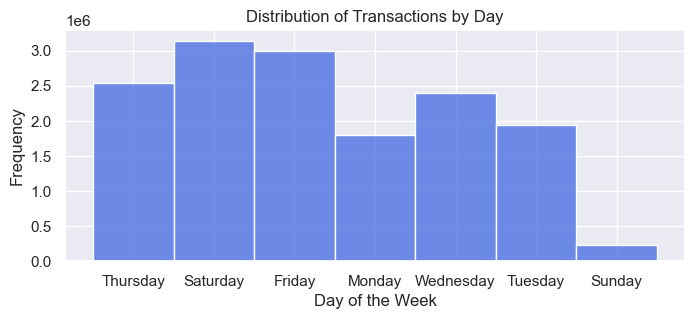

In [76]:
plt.figure(figsize=(8,3))
sns.histplot(data = data['day'], kde=False, color='royalblue')
plt.xlabel("Day of the Week")
plt.ylabel("Frequency")
plt.title("Distribution of Transactions by Day")
plt.show()

sunday has the lowest parking transactions probably because of holiday.
week days has the highest parking transactions because of working days.

3.3 How does parking demand fluctuate between weekdays and weekends?

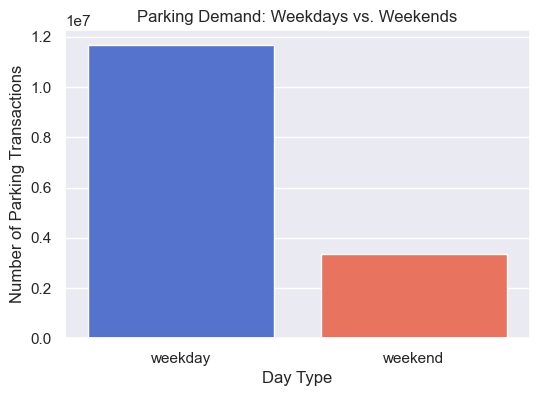

In [75]:
plt.figure(figsize=(6, 4))
sns.barplot(x=demand_comparison.index, hue=demand_comparison.index, y=demand_comparison.values, palette=["royalblue", "tomato"])
plt.xlabel("Day Type")
plt.ylabel("Number of Parking Transactions")
plt.title("Parking Demand: Weekdays vs. Weekends")
plt.show()

3.4 Are there seasonal trends in parking transactions (e.g., monthly or quarterly trends)?

In [77]:
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
quarter_names = ["Q1 (Jan-Mar)", "Q2 (Apr-Jun)", "Q3 (Jul-Sep)", "Q4 (Oct-Dec)"]

In [79]:
data['month'] = data['Start Time'].dt.month
data['quarter'] = data['Start Time'].dt.quarter
monthly_trends = data.groupby('month').size().reset_index(name='count')
quarterly_trends = data.groupby('quarter').size().reset_index(name='count')

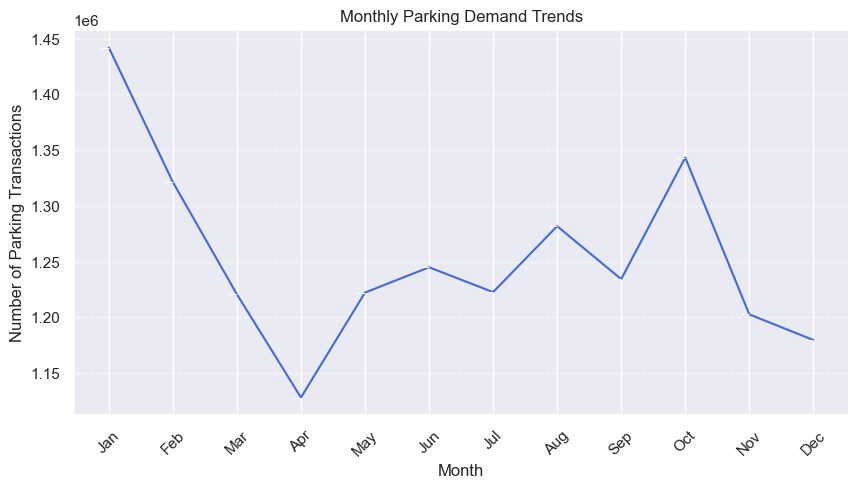

In [80]:
monthly_trends['month'] = monthly_trends['month'].apply(lambda x:month_names[x-1])
plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_trends, x='month', y='count', marker=0, color='royalblue')
plt.xlabel("Month")
plt.ylabel("Number of Parking Transactions")
plt.title("Monthly Parking Demand Trends")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()

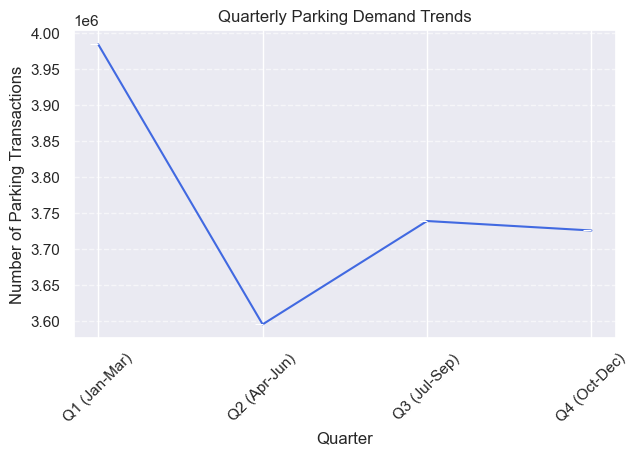

In [87]:
plt.figure(figsize=(7,4))
sns.lineplot(data=quarterly_trends, x='quarter', y='count', marker=0, color='royalblue')
plt.xlabel("Quarter")
plt.ylabel("Number of Parking Transactions")
plt.title("Quarterly Parking Demand Trends")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()

3.5 What is the average duration of a parking session?

In [89]:
average_duration = data['Duration in Minutes'].mean()
print(f"average duration of parking in minutes : {average_duration:.2f} minutes")

average duration of parking in minutes : 166.29 minutes


In [107]:
bins =[0,60,120,180,240,300,360,420,480,540,600,660,720,780,840,900]
labels = ['0-60 min', '60-120 min', '120-180 min', '180-240 min', '240-300 min', '300-360 min', '360-420 min', '420-480 min', '480-540 min', '540-600 min', '600-660 min', '660-720 min', '720-780 min', '780-840 min', '840-900 min']
data['Duration Category'] = pd.cut(data['Duration in Minutes'], bins=bins, labels=labels, right=True)
duration_counts = data['Duration Category'].value_counts()
duration_counts

Duration Category
0-60 min       4882881
60-120 min     4686810
120-180 min    2812970
180-240 min    1058017
240-300 min     611354
300-360 min     309444
360-420 min     197831
420-480 min     143228
480-540 min     104184
540-600 min      87568
600-660 min      41565
660-720 min      31579
720-780 min      21186
780-840 min      13542
840-900 min      11376
Name: count, dtype: int64

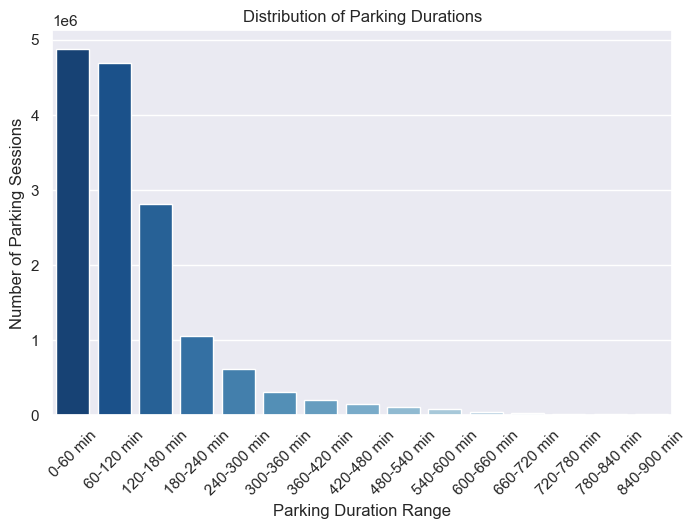

In [109]:
plt.figure(figsize=(8, 5))
sns.barplot(x=duration_counts.index, hue=duration_counts.index, y=duration_counts.values, palette="Blues_r", legend=False)
plt.xlabel("Parking Duration Range")
plt.ylabel("Number of Parking Sessions")
plt.title("Distribution of Parking Durations")
plt.xticks(rotation=45)
plt.show()

making new dataset with the changes applied in current dataset for future analysis.

In [119]:
data.to_csv("parking_Transactions_newdata.csv", index=False)